In [1]:
source(file.path("../../src/00.0_init.R"))

Joining, by = "species"



In [3]:
wd <- file.path(analysis_dir, "validation", "03_WGBS", "03.5_RRBS_test_in_WGBS")

setwd(wd)

In [144]:
summary_files = list.files(pattern = "auc_test", recursive = TRUE)

In [145]:
summary_files

[1] "ANG/auc_test.tsv" "AR/auc_test.tsv"  "ASH/auc_test.tsv" "BC/auc_test.tsv" 
 [5] "BU/auc_test.tsv"  "COY/auc_test.tsv" "CS/auc_test.tsv"  "DP/auc_test.tsv" 
 [9] "EAB/auc_test.tsv" "EPT/auc_test.tsv" "ESQ/auc_test.tsv" "GLT/auc_test.tsv"
[13] "GP/auc_test.tsv"  "JMD/auc_test.tsv" "LLA/auc_test.tsv" "MA/auc_test.tsv" 
[17] "MOL/auc_test.tsv" "PA/auc_test.tsv"  "PRA/auc_test.tsv" "ROA/auc_test.tsv"
[21] "SOS/auc_test.tsv" "SRM/auc_test.tsv" "TD/auc_test.tsv"  "WI/auc_test.tsv" 
[25] "YNM/auc_test.tsv"

In [146]:
summary_auc_list <- sapply(summary_files, fread, simplify = F)

In [147]:
summary_auc <- rbindlist(summary_auc_list)

In [148]:
length(summary_files)

[1] 25

In [149]:
head(summary_auc)

type,auc,ifRand,AUC_train,species_train
<chr>,<dbl>,<chr>,<dbl>,<chr>
Mus_musculus,0.5106540,noRandTest,0.656124,ANG
Gallus_gallus,0.6354400,noRandTest,0.656124,ANG
Phascolarctos_cinereus,0.6301300,noRandTest,0.656124,ANG
Bos_taurus,0.4865502,noRandTest,0.656124,ANG
Danio_rerio_GSE134055,0.5272450,noRandTest,0.656124,ANG
Branchiostoma_lanceolatum,0.5655030,noRandTest,0.656124,ANG


In [150]:
summary_auc[type == "Danio_rerio_GSE134055", type:="Danio_rerio",]

In [151]:
summary_auc$type <- gsub("_", " ", summary_auc$type)

In [152]:
summary_auc <- left_join(summary_auc, sp_df, by=c("species_train" = "species"))

In [153]:
summary_auc_mean <- summary_auc %>% group_by(type, group) %>% summarize(mean_auc = mean(auc), sd_auc = sd(auc))

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.



In [154]:
head(summary_auc_mean)

type,group,mean_auc,sd_auc
<chr>,<fct>,<dbl>,<dbl>
Bos taurus,Inv.,0.5754485,0.04047710
Bos taurus,Act.,0.5489090,0.08818868
Bos taurus,Rep.,0.5946979,0.01216854
Bos taurus,Av.,0.6127421,0.02739744
Bos taurus,Mar.,0.6506439,NA
Bos taurus,Mam.,0.6331124,0.02869777


In [155]:
summary_auc_mean_mtx <- summary_auc_mean[,-4] %>% pivot_wider(names_from = type, values_from = mean_auc)

In [156]:
summary_auc_mean_mtx <- as.data.frame(summary_auc_mean_mtx)
row.names(summary_auc_mean_mtx) <- summary_auc_mean_mtx$group
summary_auc_mean_mtx <- summary_auc_mean_mtx[,-1]

In [157]:
WGBS_species_order <- c('Branchiostoma lanceolatum','Danio rerio','Xenopus laevis', 'Gallus gallus', 'Phascolarctos cinereus', 'Mus musculus','Bos taurus')

In [158]:
colnames(summary_auc_mean_mtx)

[1] "Bos taurus"                "Branchiostoma lanceolatum"
[3] "Danio rerio"               "Gallus gallus"            
[5] "Mus musculus"              "Phascolarctos cinereus"   
[7] "Xenopus laevis"

In [159]:
summary_auc_mean_mtx

,Bos taurus,Branchiostoma lanceolatum,Danio rerio,Gallus gallus,Mus musculus,Phascolarctos cinereus,Xenopus laevis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inv.,0.5754485,0.5108943,0.5280897,0.6475037,0.5703160,0.6699183,0.5083497
Act.,0.5489090,0.5271395,0.5327735,0.6616010,0.5355305,0.6636725,0.5184330
Rep.,0.5946979,0.4790767,0.5477490,0.7281493,0.6105603,0.7514080,0.5146983
Av.,0.6127421,0.5004649,0.5490327,0.7209336,0.6033244,0.7074149,0.5262514
Mar.,0.6506439,0.4922970,0.5464070,0.7257120,0.6304000,0.7207650,0.4958010
Mam.,0.6331124,0.4700767,0.5248526,0.7278417,0.6484818,0.7373789,0.5051709


In [160]:
annot_row <- unique(sp_df[color_class!="Jawless_vertebrate", c("group", "color_class")])

In [161]:
annot_row

group,color_class
<fct>,<fct>
Inv.,Invertebrata
Ch.,Chondrichthyes
Act.,Actinopteri
Amp.,Amphibia
Rep.,Reptilia
Av.,Aves
Mar.,Marsupialia
Mam.,Mammalia


In [162]:
annot_row <- as.data.frame(annot_row)
row.names(annot_row) <- annot_row$group
annot_row <- annot_row[, -1, drop = FALSE]

In [163]:
summary_auc_mean_mtx

,Bos taurus,Branchiostoma lanceolatum,Danio rerio,Gallus gallus,Mus musculus,Phascolarctos cinereus,Xenopus laevis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inv.,0.5754485,0.5108943,0.5280897,0.6475037,0.5703160,0.6699183,0.5083497
Act.,0.5489090,0.5271395,0.5327735,0.6616010,0.5355305,0.6636725,0.5184330
Rep.,0.5946979,0.4790767,0.5477490,0.7281493,0.6105603,0.7514080,0.5146983
Av.,0.6127421,0.5004649,0.5490327,0.7209336,0.6033244,0.7074149,0.5262514
Mar.,0.6506439,0.4922970,0.5464070,0.7257120,0.6304000,0.7207650,0.4958010
Mam.,0.6331124,0.4700767,0.5248526,0.7278417,0.6484818,0.7373789,0.5051709


In [164]:
WGBS_species_order

[1] "Branchiostoma lanceolatum" "Danio rerio"              
[3] "Xenopus laevis"            "Gallus gallus"            
[5] "Phascolarctos cinereus"    "Mus musculus"             
[7] "Bos taurus"

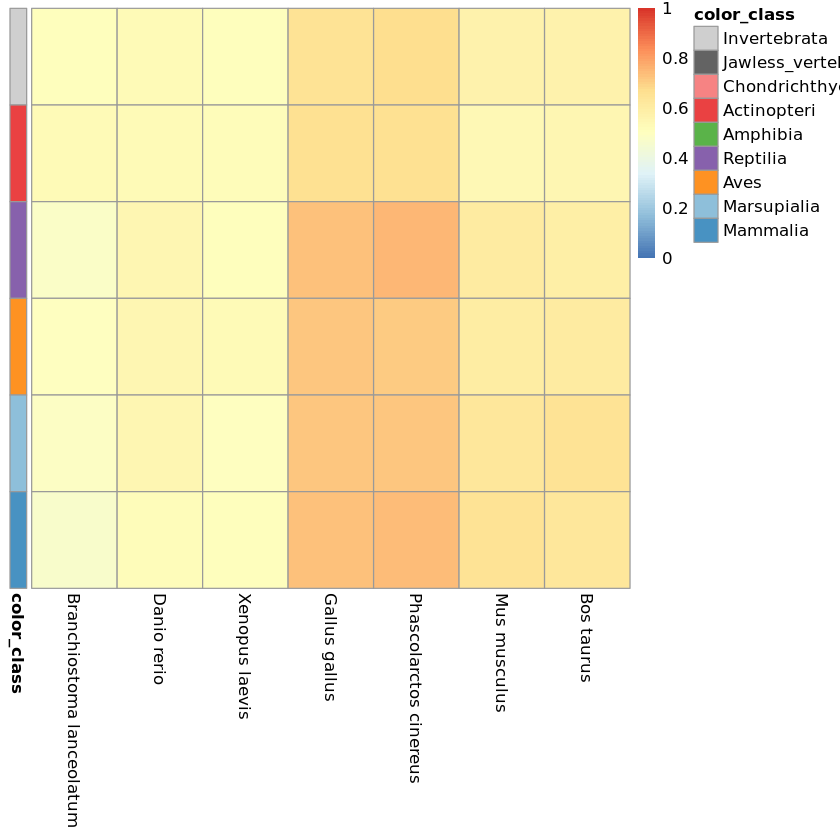

In [166]:
pheatmap(summary_auc_mean_mtx[, WGBS_species_order], 
         cluster_rows = FALSE, 
         cluster_cols = FALSE, annotation_row = annot_row,
         show_rownames = F,breaks = seq(0, 1, length.out = 100),
         annotation_colors = list(color_class = class_colors))

In [167]:
### without the grouping

In [168]:
summary_auc_wide <- summary_auc[,c("type", "species_train", "auc")] %>% pivot_wider(names_from = type, values_from = auc)

In [169]:
head(summary_auc_wide)

species_train,Mus musculus,Gallus gallus,Phascolarctos cinereus,Bos taurus,Danio rerio,Branchiostoma lanceolatum,Xenopus laevis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ANG,0.510654,0.635440,0.630130,0.4865502,0.527245,0.565503,0.466317
AR,0.602812,0.702654,0.731050,0.5986412,0.519147,0.469167,0.527502
ASH,0.491265,0.518542,0.536756,0.5299632,0.496849,0.519920,0.520352
BC,0.651485,0.732425,0.755281,0.6364336,0.526837,0.470064,0.492608
BU,0.572545,0.724961,0.705848,0.6115973,0.566742,0.504439,0.504367
COY,0.679732,0.756447,0.760663,0.6696849,0.518524,0.448413,0.513149


In [170]:
summary_auc_wide <- as.data.frame(summary_auc_wide)
row.names(summary_auc_wide) <- summary_auc_wide$species_train
summary_auc_wide <- summary_auc_wide[,-1]

In [171]:
annot_row <- as.data.frame(sp_df[species %in% summary_auc$species_train, -3])

In [172]:
row.names(annot_row) <- annot_row$species

In [173]:
annot_row <- annot_row[, -1, drop = FALSE]

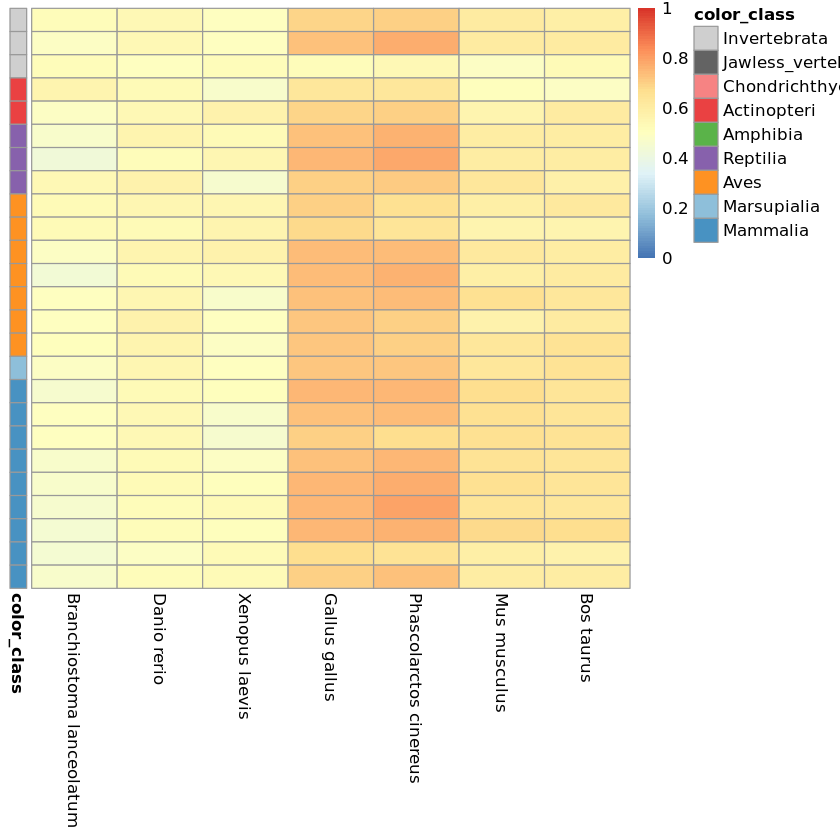

In [175]:
pheatmap(summary_auc_wide[row.names(annot_row), WGBS_species_order], 
         cluster_rows = FALSE, 
         cluster_cols = FALSE, annotation_row = annot_row,
         show_rownames = F,
         annotation_colors = list(color_class = class_colors), 
        breaks = seq(0, 1, length.out = 100))